# Sussix

[See https://cds.cern.ch/record/333077 for initial reference]

For regular particle motion in the KAM region, the phase space trajectories can be decomposed into a series of spectral lines made of linear combinations of the fundamental tunes, $Q_x$,$Q_y$,$Q_\zeta$.

For the horizontal particle coordinates $(x,p_x)$ transformed into the linearly normalised Courant-Snyder variables $(\tilde x,\tilde p_x)$, we get after $N$ turns:

$$z(N) = \tilde x - i\tilde p_x = \sum_{jk\ell m} A_{jk \ell m} e^{2\pi i[jQ_x + k Q_y + \ell Q_\zeta + m]N}$$

where $A_{jk \ell m}$ is a complex quantity encoding both the amplitude and the phase of the spectral line. For linear motion, only the fundamental tune $Q_x$ is present and the trajectory (a circle) can be written as:
$$\tilde x - i\tilde p_x = \sqrt{2J_x}\ e^{2\pi i[Q_x]N}$$


As a generalisation of the Fourier series to the complex plane, one can understand that any phase space trajectory $\tilde x - i\tilde p_x $ can be expressed as a sum of phasors, but that the particular constraints of the Hamiltonian of particle accelerators warrants us to look for phasors whose frequencies are a linear combinations of the fundamental tunes.

R. Bartolini and F. Schmidt have shown that the the complex coefficients $A_{jk \ell m}$ can be used to find the transformation to the new set of canonical coordinates.





---
# The Algorithm
---

The Sussix algorithm is no different from the NAFF (Numerical Analysis of the Fundamental Frequencies) introduced by Laskar, but does benefit from a very well optimized numerical approach, allowing to get the spectral lines up to machine precision in noiseless cases. 


Let's start with the signal processing. The Discrete Fourier Transform (DFT) $\bar z (\nu)$ of the complex function $z(N)$ can be defined as:
$$\bar z(\nu) = \sum_{N=0}^{N_t-1} e^{-2\pi i\ \nu N}z(N)\qquad \text{where}\qquad \nu = m/N_t,\ m\in \Z $$


---
# Normal form, linear case
---

The 1D linear motion of a particle follows the well-known expressions:
$$\begin{aligned}x &= \sqrt{2\beta_x J_x}\cos(2\pi Q_x\ N)\\
p_x &= -\sqrt{\frac{2J_x}{\beta_x}}\Big(\sin(2\pi Q_x\ N) + \alpha_x \cos(2\pi Q_x\ N)\Big)\end{aligned}$$

Expanding the sine and cosines with complex exponentials, one can show that the equivalent harmonic description is:
$$x - ip_x = A_+ e^{2\pi i[\ Q_x\ ] N} + A_- e^{-2\pi i[\ Q_x\ ] N}$$

with
$$A_\pm = \frac{1}{2}\sqrt{\frac{2J_x}{\beta_x}}\Big(\beta_x + i\alpha_x \pm 1 \Big)$$

In normalised coordinates, one would expect to be able to write:
$$\tilde x - i \tilde p_x = \sqrt{2J_x}e^{i\phi_0} e^{2\pi i[\ Q_x\ ] N}$$



---
# Sympy below
---

In [69]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

from IPython.display import display, Latex
def print_eq(lhs,rhs):
    result = "$${} = {}$$".format(sp.latex(lhs), sp.latex(rhs))
    display(Latex(result))


x,px,a,ap,am,Qx, N = sp.symbols('x p_x z a_+ a_- Q_x N',real=True,positive=True)

In [70]:
expr = ap*sp.exp(2*sp.pi*sp.I*(Qx)*N) + am*sp.exp(-2*sp.pi*sp.I*(Qx)*N)
print(120*'-')
print_eq(x-sp.I*px,expr)

expr = expr.expand(complex = True).simplify().collect([sp.cos(2*sp.pi*(Qx)*N),sp.sin(2*sp.pi*(Qx)*N)])
print(120*'-')
print_eq(x-sp.I*px,expr)

print(120*'-')
print_eq(x,sp.re(expr))
print_eq(px,-sp.im(expr))




------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

------------------------------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

---
# opposite
---

In [101]:
z,x, px, phi, Jx, alpha ,beta ,gamma, Ap,Am = sp.symbols(' z x p_x phi J_x alpha beta gamma A_+ A_-',real=True,positive=True)

In [106]:
_x = sp.sqrt(2*beta*Jx)*sp.cos(phi)
_px = -sp.sqrt(2*Jx/beta)*(sp.sin(phi) + alpha*sp.cos(phi))
print_eq(x,_x)
print_eq(px,_px)


_z = _x - sp.I*_px
_z = _z.rewrite((sp.sin, sp.cos), sp.exp)

print(100*'-')
print_eq(z,x - sp.I*px)
print_eq(z,_z)


_z = _z.expand().collect([sp.exp(sp.I*phi),sp.exp(-sp.I*phi)])
print_eq(z,_z)
_Ap = _z.coeff(sp.exp(sp.I*phi)).simplify()
_Am = _z.coeff(sp.exp(-sp.I*phi)).simplify()
print_eq(Ap,_Ap)
print_eq(Am,_Am)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

----------------------------------------------------------------------------------------------------


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

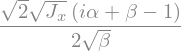

In [105]:
_Am.simplify()

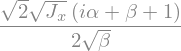

In [104]:
_Ap.simplify()

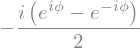

In [85]:
_z = _z.collect

print_eq(x,_x)
print_eq(px,_px)
print(100*'-')
print_eq(z,x - sp.I*px)
print_eq(z,_z)

In [31]:
sp.cos(2*sp.pi*(Qx)*N)